In [170]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

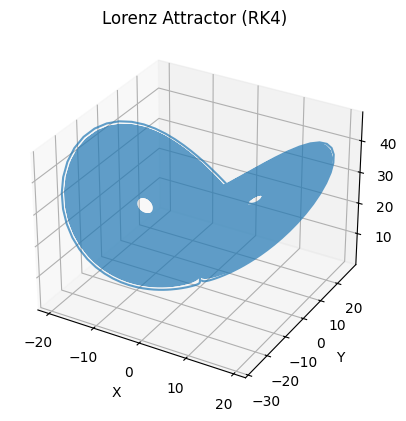

In [171]:
# Lorenz system parameters
sigma = 10
rho = 28
beta = 8/3

# Lorenz equations
def lorenz(x, y, z, sigma=sigma, rho=rho, beta=beta):
    x_dot = sigma * (y - x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta * z
    return x_dot, y_dot, z_dot

# Runge-Kutta 4th order method
def rk4_step(x, y, z, dt):
    k1_x, k1_y, k1_z = lorenz(x, y, z)
    k2_x, k2_y, k2_z = lorenz(x + 0.5 * dt * k1_x, y + 0.5 * dt * k1_y, z + 0.5 * dt * k1_z)
    k3_x, k3_y, k3_z = lorenz(x + 0.5 * dt * k2_x, y + 0.5 * dt * k2_y, z + 0.5 * dt * k2_z)
    k4_x, k4_y, k4_z = lorenz(x + dt * k3_x, y + dt * k3_y, z + dt * k3_z)
    x_new = x + (dt / 6.0) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    y_new = y + (dt / 6.0) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
    z_new = z + (dt / 6.0) * (k1_z + 2 * k2_z + 2 * k3_z + k4_z)
    return x_new, y_new, z_new

# Time step
dt = 0.01
num_steps = 1000000

# Initial conditions
x = np.zeros(num_steps + 1)
y = np.zeros(num_steps + 1)
z = np.zeros(num_steps + 1)

# Set initial values
x[0], y[0], z[0] = (0., 1., 1.05)

# Solve the differential equations using RK4 method
for i in range(num_steps):
    x[i + 1], y[i + 1], z[i + 1] = rk4_step(x[i], y[i], z[i], dt)
    

# Plot the Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (RK4)')

plt.show()

x_intercept = []
y_intercept = []
plane_height = 14


for i in range(len(z)):
    if z[i] < plane_height and z[i+1] > plane_height:
        x_intercept.append((x[i]))
        y_intercept.append((y[i]))
    else:
        pass

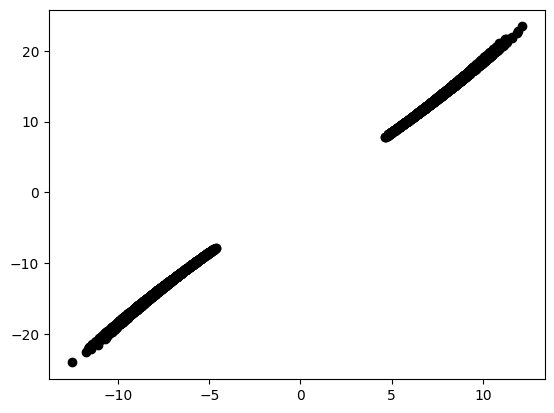

In [172]:
plt.plot(x_intercept, y_intercept, marker = 'o', linestyle = '', color = 'black')
plt.show()

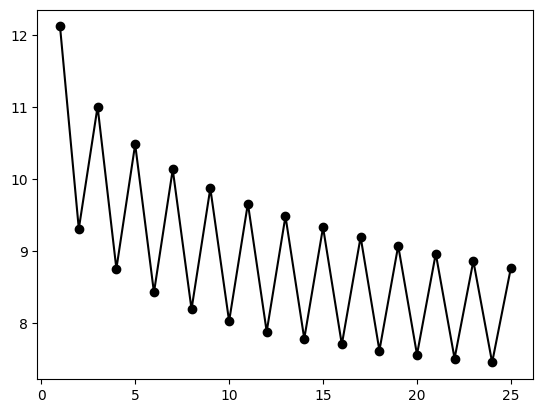

In [173]:
def smk(x, y, m, k):
    N = len(x)
    s = [] 
    for i in range(int(np.floor((N - m) / k))):
        point = [x[m+(i*k) -1 ], y[m+(i*k) -1 ]]
        s.append(point)
    return  s

def lmk(x, y, m, k):
    N = len(x)
    points = smk(x, y, m, k)

    total_distance = 0
    for i in range(len(points) - 1):
        distance = np.linalg.norm(np.array(points[i + 1]) - np.array(points[i]))
        total_distance += distance
    Lmk = (total_distance * (N - m)) / (k * (int(np.floor(N - m) / k)))
    return Lmk

def lk(x, y, k):
    moyenne = 0
    for m in range(1, k +1):
        moyenne += lmk(x, y, m, k)
    Lk = moyenne / k
    return Lk 

#print(lmk(x_intercept, y_intercept, 1, 1))
#print(lmk(x_intercept, y_intercept, 1, 2))
#print(lmk(x_intercept, y_intercept, 2, 2))
#print(lk(x_intercept, y_intercept, 2))


K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 , 20, 21, 22, 23, 24, 25]
l_de_k = []
for k in range(1, len(K) + 1):
    l_de_k.append(lk(x_intercept, y_intercept, k))


plt.plot(K, np.log(l_de_k), marker = 'o', linestyle = '-', color = 'black')
plt.show()
